In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [63]:
import numpy as np
import scipy as sc
import pandas as pd
import datetime as dt

In [3]:
pd.options.display.float_format = "{:,.3f}".format

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import inspect

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

In [11]:
# Print column names in the Measurement table
columns = inspector.get_columns('Measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set using SQL
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [13]:
# Calculate the date one year from the last date in data set.

In [14]:
OneYearAgoDate = dt.date(2017,8,23) - dt.timedelta(days=365)
OneYearAgoDate

datetime.date(2016, 8, 23)

In [15]:
# Perform a query to retrieve the data and precipitation scores
# Design a query to retrieve the last 12 months of precipitation data
OneYearPrecipitation = session.query(Measurement.date, Measurement.prcp).\
                        filter(Measurement.date >= '2016-08-23').\
                        group_by(Measurement.date).\
                        order_by(Measurement.date).all()

In [16]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date

In [17]:
OneYearPRCP_df = pd.DataFrame(OneYearPrecipitation).set_index('date')
OneYearPRCP_df

,prcp
date,
2016-08-23,0.000
2016-08-24,0.080
2016-08-25,0.080
2016-08-26,0.000
2016-08-27,0.000
...,...
2017-08-19,0.000
2017-08-20,0.000
2017-08-21,0.000


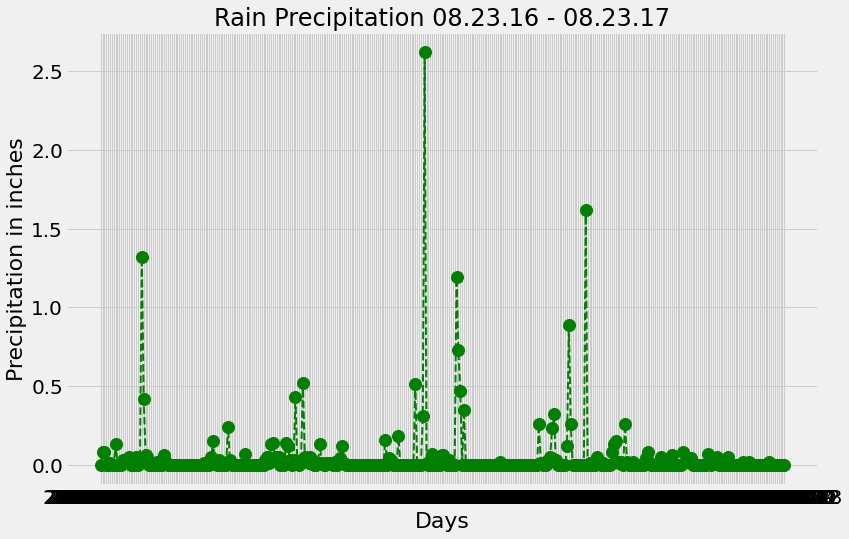

In [18]:
# Use Pandas Plotting with Matplotlib to plot the data
x_values = OneYearPRCP_df.index
y_values = OneYearPRCP_df.prcp

fig1 = plt.figure(figsize = (12,8))
plt.plot(x_values, y_values, 'go--', linewidth =2, markersize =12)

plt.title("Rain Precipitation 08.23.16 - 08.23.17",fontdict ={"fontsize":24})
plt.suptitle("")
plt.xlabel("Days", fontdict={"fontsize":22})
plt.ylabel("Precipitation in inches", fontdict={"fontsize":22})
plt.tight_layout(pad = 2.0, w_pad = 1.5, h_pad = 2.0)
plt.xticks(fontsize = 20, color = 'k', rotation = 0)
plt.yticks(fontsize = 20, color = 'k', rotation = 0)

plt.savefig("LatestYearPrecipitation.png")
plt.show()

## Summary Statistics

In [19]:
# Use Pandas to calcualte the summary statistics for the precipitation data

In [20]:
OneYearPRCP_df.describe()

,prcp
count,364.000
mean,0.049
std,0.205
min,0.000
25%,0.000
50%,0.000
75%,0.020
max,2.620


In [21]:
OneYearPRCP_df['month']=pd.DatetimeIndex(OneYearPRCP_df.index).month
OneYearPRCP_df.head()

,prcp,month
date,,
2016-08-23,0.000,8
2016-08-24,0.080,8
2016-08-25,0.080,8
2016-08-26,0.000,8
2016-08-27,0.000,8


In [22]:
Monthly_OneYearPRCP = OneYearPRCP_df.groupby('month').prcp.sum()
monthly_prcp_df = pd.DataFrame(Monthly_OneYearPRCP)
monthly_prcp_df

,prcp
month,
1,0.410
2,3.680
3,2.760
4,1.950
5,2.650
6,0.370
7,0.420
8,0.360
9,2.130


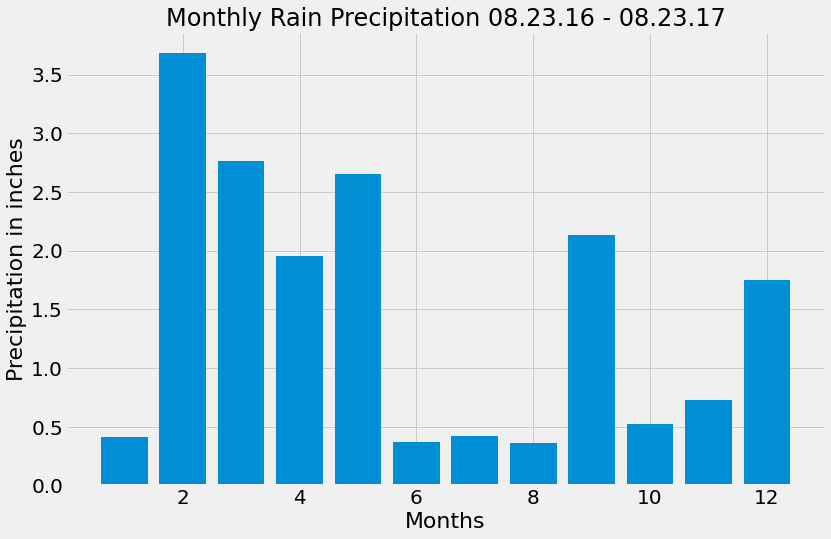

In [23]:
# Use Pandas Plotting with Matplotlib to monthly precipitation of the last year
x_values = monthly_prcp_df.index
y_values = monthly_prcp_df.prcp

fig3 = plt.figure(figsize = (12,8))
plt.bar(x_values, y_values)

plt.title("Monthly Rain Precipitation 08.23.16 - 08.23.17",fontdict ={"fontsize":24})
plt.suptitle("")
plt.xlabel("Months", fontdict={"fontsize":22})
plt.ylabel("Precipitation in inches", fontdict={"fontsize":22})
plt.tight_layout(pad = 2.0, w_pad = 1.5, h_pad = 2.0)
plt.xticks(fontsize = 20, color = 'k', rotation = 0)
plt.yticks(fontsize = 20, color = 'k', rotation = 0)

plt.savefig("MonlthlyPrecipitation.png")
plt.show()

# Exploratory Station Analysis

In [24]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(Station.station).count()
total_stations

9

In [25]:
all_measures = session.query(Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).all()

In [26]:
all_measures_df = pd.DataFrame(all_measures)
all_measures_df.head()

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.080,65.000
1,USC00519397,2010-01-02,0.000,63.000
2,USC00519397,2010-01-03,0.000,74.000
3,USC00519397,2010-01-04,0.000,76.000
4,USC00519397,2010-01-06,nan,73.000


In [27]:
# List the stations and the counts in descending order.
m_stations_df = pd.DataFrame(all_measures_df.groupby("station").date.count())
m_stations_df.columns = ['no_readings']
m_stations_df.sort_values(by='no_readings',ascending=False)

,no_readings
station,
USC00519281,2772
USC00519397,2724
USC00513117,2709
USC00519523,2669
USC00516128,2612
USC00514830,2202
USC00511918,1979
USC00517948,1372
USC00518838,511


In [28]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
Most_active_station_df = all_measures_df[all_measures_df['station']=='USC00519281']
Most_active_station_df

,station,date,prcp,tobs
12187,USC00519281,2010-01-01,0.150,70.000
12188,USC00519281,2010-01-02,0.000,62.000
12189,USC00519281,2010-01-03,0.000,74.000
12190,USC00519281,2010-01-04,0.000,75.000
12191,USC00519281,2010-01-05,0.000,74.000
...,...,...,...,...
14954,USC00519281,2017-08-14,0.000,77.000
14955,USC00519281,2017-08-15,0.320,77.000
14956,USC00519281,2017-08-16,0.120,76.000
14957,USC00519281,2017-08-17,0.010,76.000


### Most Active Station Last 12 Months Analysis

In [29]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

most_active_last_year = session.query(Measurement.date, Measurement.prcp, Measurement.tobs).\
                        filter(Measurement.date >= '2016-08-23').\
                        filter(Measurement.station == 'USC00519281')         

most_active_station_year_df = pd.DataFrame(most_active_last_year)

In [30]:
# Using the most active station id calculate the lowest, highest, and average temperature.
Highest_Temperature = Most_active_station_df['tobs'].max()
Average_Temperature = Most_active_station_df['tobs'].mean()
Lowest_Temperature =  Most_active_station_df['tobs'].min()

print("-----------------------------------------------")
print(" The Highest Temperature is:", '{:.2f}'.format(Highest_Temperature))
print(" The Lowest  Temperature is:", '{:.2f}'.format(Lowest_Temperature))
print(" The Average Temperature is:", '{:.2f}'.format(Average_Temperature))
print(" ")
print("-----------------------------------------------")


-----------------------------------------------
 The Highest Temperature is: 85.00
 The Lowest  Temperature is: 54.00
 The Average Temperature is: 71.66
 
-----------------------------------------------


In [31]:
most_active_station_year_df.describe()

,prcp,tobs
count,352.000,352.000
mean,0.199,73.108
std,0.419,4.733
min,0.000,59.000
25%,0.000,70.000
50%,0.060,74.000
75%,0.190,77.000
max,2.980,83.000


### Histogram of Temperature at Station USC00519281

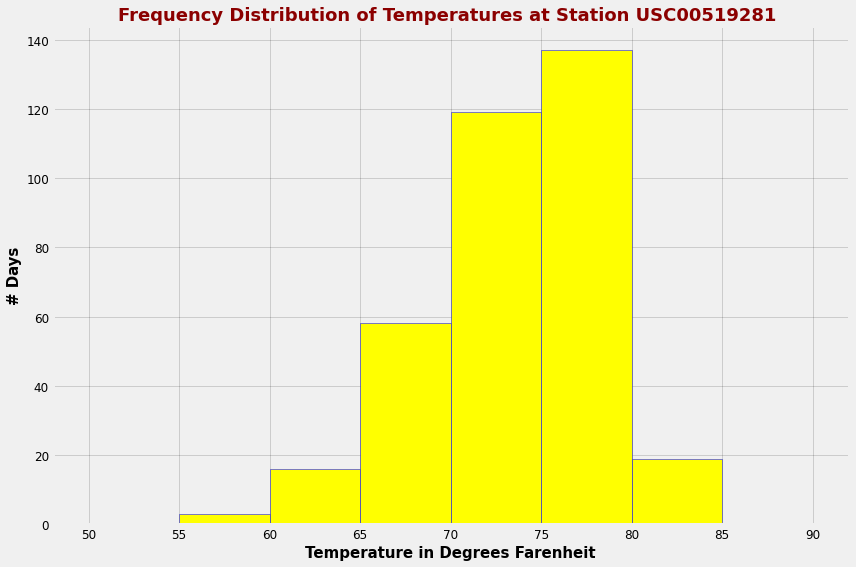

In [32]:
bins = [50, 55, 60, 65,70,75,80,85,90]

fig5 = plt.figure(figsize =(12,8))
values = most_active_station_year_df.tobs
plt.title("Frequency Distribution of Temperatures at Station USC00519281 ", fontsize = 18, fontweight ='bold', color='darkred')
plt.xlabel("Temperature in Degrees Farenheit", fontsize = 15, fontweight ='bold')
plt.ylabel("# Days", fontsize = 15, fontweight ='bold')

plt.hist(values, bins=bins, edgecolor = 'b', facecolor = 'yellow')
plt.xticks(fontsize = 12, color = 'k', rotation = 0)
plt.yticks(fontsize = 12, color = 'k', rotation = 0)

plt.grid(color='k', alpha = 0.15)

plt.tight_layout(pad=0.8, w_pad=1.4, h_pad=1.0)

plt.savefig("Temperatures_USC00519281.png")
plt.show()

### EXTRA: Histogram of Precipitation at Station USC00519281

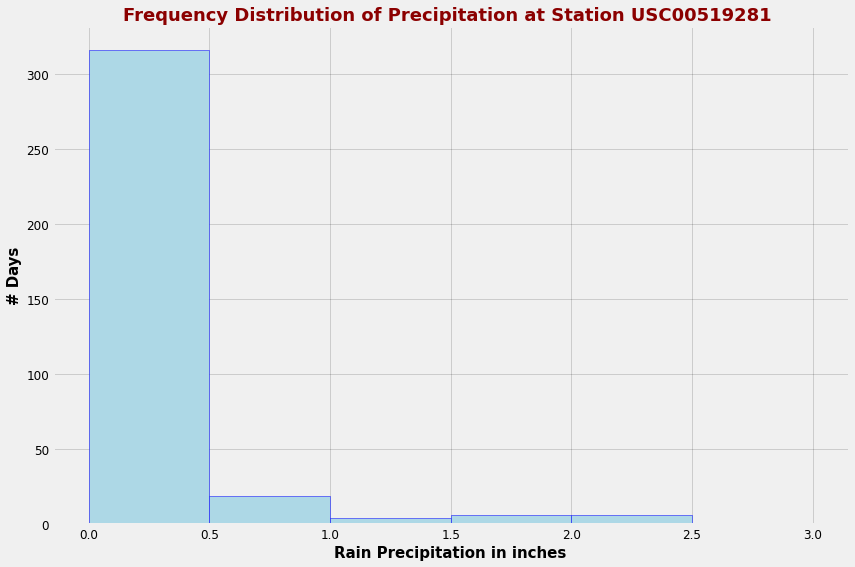

In [33]:
bins = [0,0.5,1.0,1.5,2.0,2.5,3.0]

fig6 = plt.figure(figsize =(12,8))
values = most_active_station_year_df.prcp
plt.title("Frequency Distribution of Precipitation at Station USC00519281 ", fontsize = 18, fontweight ='bold', color='darkred')
plt.xlabel("Rain Precipitation in inches", fontsize = 15, fontweight ='bold')
plt.ylabel("# Days", fontsize = 15, fontweight ='bold')

plt.hist(values, bins=bins, edgecolor = 'b', facecolor = 'lightblue')
plt.xticks(fontsize = 12, color = 'k', rotation = 0)
plt.yticks(fontsize = 12, color = 'k', rotation = 0)

plt.grid(color='k', alpha = 0.15)

plt.tight_layout(pad=0.8, w_pad=1.4, h_pad=1.0)

plt.savefig("Precipitation_USC00519281.png")
plt.show()

# Temperature Analysis I

## Comparing Temperatures and Precipitation in Hawaii

In [35]:
all_measures_df.head()

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.080,65.000
1,USC00519397,2010-01-02,0.000,63.000
2,USC00519397,2010-01-03,0.000,74.000
3,USC00519397,2010-01-04,0.000,76.000
4,USC00519397,2010-01-06,nan,73.000


In [36]:
# Convert date to a date stamp
all_measures_df['date']=pd.to_datetime(all_measures_df['date'])
all_measures_df.dtypes

station            object
date       datetime64[ns]
prcp              float64
tobs              float64
dtype: object

In [37]:
# Extract the Month Number from the Date
all_measures_df['month']=pd.DatetimeIndex(all_measures_df.date).month
all_measures_df

,station,date,prcp,tobs,month
0,USC00519397,2010-01-01,0.080,65.000,1
1,USC00519397,2010-01-02,0.000,63.000,1
2,USC00519397,2010-01-03,0.000,74.000,1
3,USC00519397,2010-01-04,0.000,76.000,1
4,USC00519397,2010-01-06,nan,73.000,1
...,...,...,...,...,...
19545,USC00516128,2017-08-19,0.090,71.000,8
19546,USC00516128,2017-08-20,nan,78.000,8
19547,USC00516128,2017-08-21,0.560,76.000,8
19548,USC00516128,2017-08-22,0.500,76.000,8


In [38]:
# Get the month name from the month code
all_measures_df['month_name']=all_measures_df['date'].dt.strftime("%B")
all_measures_df

,station,date,prcp,tobs,month,month_name
0,USC00519397,2010-01-01,0.080,65.000,1,January
1,USC00519397,2010-01-02,0.000,63.000,1,January
2,USC00519397,2010-01-03,0.000,74.000,1,January
3,USC00519397,2010-01-04,0.000,76.000,1,January
4,USC00519397,2010-01-06,nan,73.000,1,January
...,...,...,...,...,...,...
19545,USC00516128,2017-08-19,0.090,71.000,8,August
19546,USC00516128,2017-08-20,nan,78.000,8,August
19547,USC00516128,2017-08-21,0.560,76.000,8,August
19548,USC00516128,2017-08-22,0.500,76.000,8,August


In [39]:
month_measures_df = all_measures_df[['month','month_name','prcp','tobs']]
month_measures_df

,month,month_name,prcp,tobs
0,1,January,0.080,65.000
1,1,January,0.000,63.000
2,1,January,0.000,74.000
3,1,January,0.000,76.000
4,1,January,nan,73.000
...,...,...,...,...
19545,8,August,0.090,71.000
19546,8,August,nan,78.000
19547,8,August,0.560,76.000
19548,8,August,0.500,76.000


## Temperature Analysis Per Month Across All Years

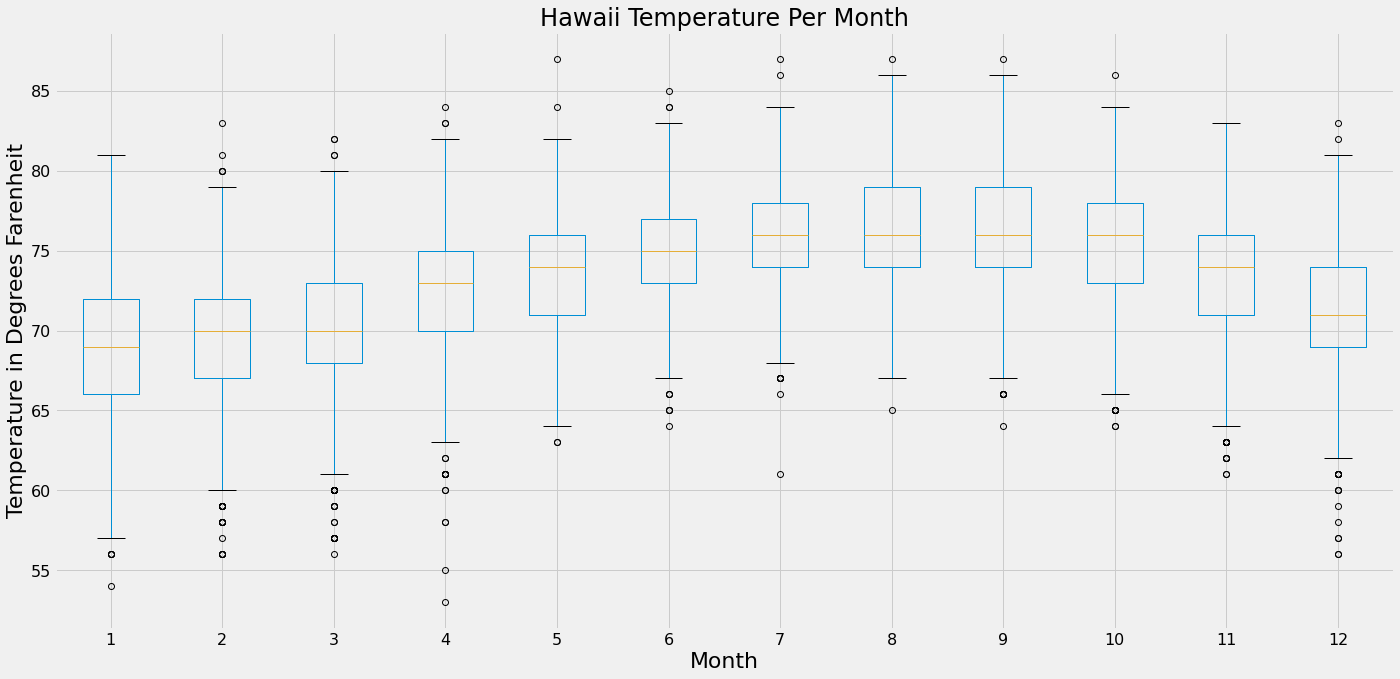

In [48]:
# BoxPlot of Temperature By Month
month_measures_df.boxplot("tobs", by="month", figsize = (20,10))

plt.title("Hawaii Temperature Per Month",fontdict ={"fontsize":24})
plt.suptitle("")
plt.xlabel("Month", fontdict={"fontsize":22})
plt.ylabel("Temperature in Degrees Farenheit", fontdict={"fontsize":22})
plt.tight_layout(pad = 2.0, w_pad = 1.5, h_pad = 2.0)
plt.xticks(fontsize = 16, color = 'k', rotation = 0)
plt.yticks(fontsize = 16, color = 'k', rotation = 0)

plt.savefig("Hawaii_Temps_Per_Month.png")
plt.show()

### Temperature Analysis Comparing June to December

In [53]:
june_dec_df = month_measures_df[(month_measures_df.month == 6) | (month_measures_df.month == 12)]
june_dec_df

,month,month_name,prcp,tobs
133,6,June,0.000,78.000
134,6,June,0.010,76.000
135,6,June,0.000,78.000
136,6,June,0.000,76.000
137,6,June,0.000,77.000
...,...,...,...,...
19492,6,June,0.020,79.000
19493,6,June,0.100,74.000
19494,6,June,0.020,74.000
19495,6,June,0.040,76.000


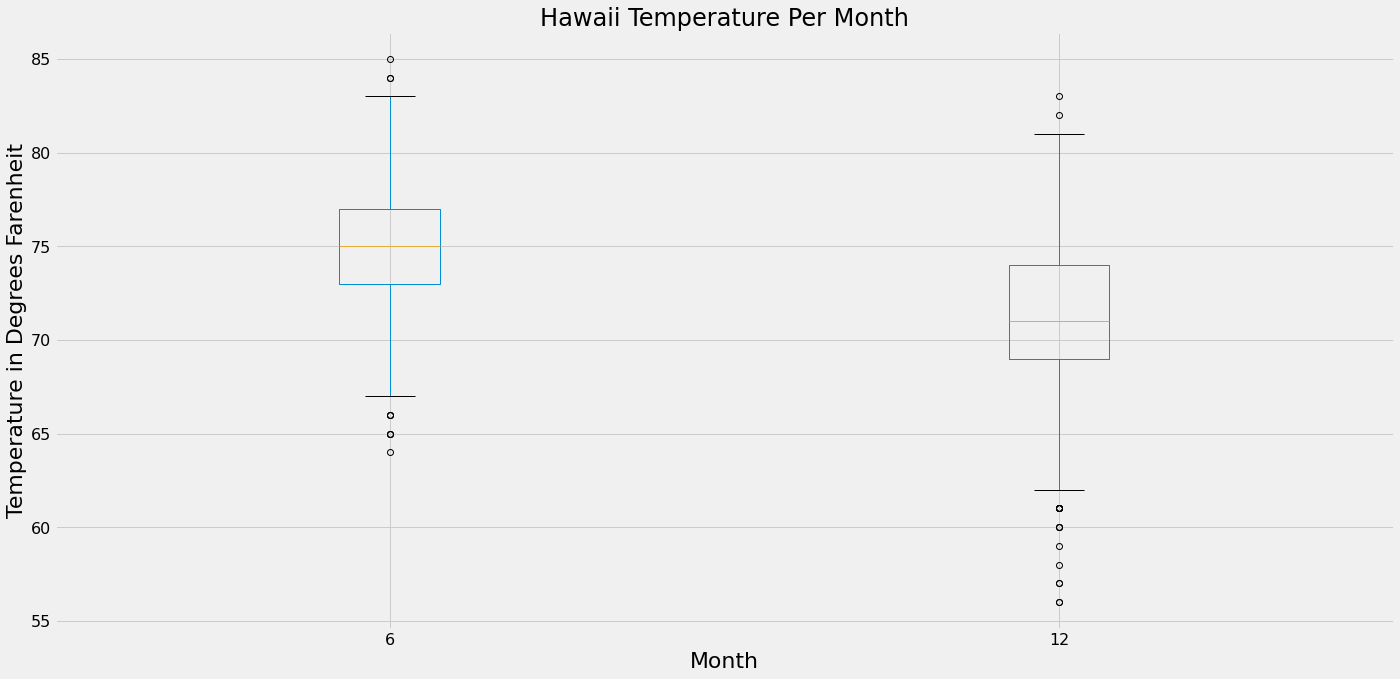

In [56]:
# BoxPlot of Temperature in June and December
june_dec_df.boxplot("tobs", by="month", figsize = (20,10))

plt.title("Hawaii Temperature Per Month",fontdict ={"fontsize":24})
plt.suptitle("")
plt.xlabel("Month", fontdict={"fontsize":22})
plt.ylabel("Temperature in Degrees Farenheit", fontdict={"fontsize":22})
plt.tight_layout(pad = 2.0, w_pad = 1.5, h_pad = 2.0)
plt.xticks(fontsize = 16, color = 'k', rotation = 0)
plt.yticks(fontsize = 16, color = 'k', rotation = 0)

plt.savefig("Hawaii_Temps_June_Dec.png")
plt.show()

In [59]:
June_temps = june_dec_df[(june_dec_df.month == 6)]
Dec_temps = june_dec_df[(june_dec_df.month == 12)]

In [60]:
June_temps.describe()

,month,prcp,tobs
count,"1,700.000","1,574.000","1,700.000"
mean,6.000,0.136,74.944
std,0.000,0.336,3.257
min,6.000,0.000,64.000
25%,6.000,0.000,73.000
50%,6.000,0.020,75.000
75%,6.000,0.120,77.000
max,6.000,4.430,85.000


In [61]:
Dec_temps.describe()

,month,prcp,tobs
count,"1,517.000","1,405.000","1,517.000"
mean,12.000,0.217,71.042
std,0.000,0.541,3.746
min,12.000,0.000,56.000
25%,12.000,0.000,69.000
50%,12.000,0.030,71.000
75%,12.000,0.150,74.000
max,12.000,6.420,83.000


## T-Test Analysis

In [72]:
from scipy.stats import ttest_ind

In [73]:
a = June_temps['tobs']
b = Dec_temps['tobs']

In [70]:
a

133     78.000
134     76.000
135     78.000
136     76.000
137     77.000
         ...  
19492   79.000
19493   74.000
19494   74.000
19495   76.000
19496   75.000
Name: tobs, Length: 1700, dtype: float64

In [71]:
b

305     76.000
306     74.000
307     74.000
308     64.000
309     64.000
         ...  
19323   71.000
19324   71.000
19325   69.000
19326   65.000
19327   65.000
Name: tobs, Length: 1517, dtype: float64

In [75]:
ttest_ind(a,b)

Ttest_indResult(statistic=31.60372399000329, pvalue=3.9025129038616655e-191)

In [ ]:
# Another Way to do the T-Test: Paired T-Test

In [89]:
def compare_months(x,y,alpha,sample_size):
    stat,p = ttest_ind(x,y)
    print ('Statistics = %.4f, p= %.4f' % (stat,p))
    if p>alpha:
        print("Same Distribution - Equivalent Environment in the two months")
    else:
        print("Different Distribution - Statistically Significant Difference in the two months")

In [90]:
sample_size = 500
alpha = 0.05
june_sample = np.random.choice(a, sample_size)
dec_sample = np.random.choice(b, sample_size)
compare_months(june_sample, dec_sample, alpha, sample_size)

Statistics = 16.9584, p= 0.0000
Different Distribution - Statistically Significant Difference in the two months


### Precipitation Analysis comparing June and December (EXTRA NOT REQUIRED)

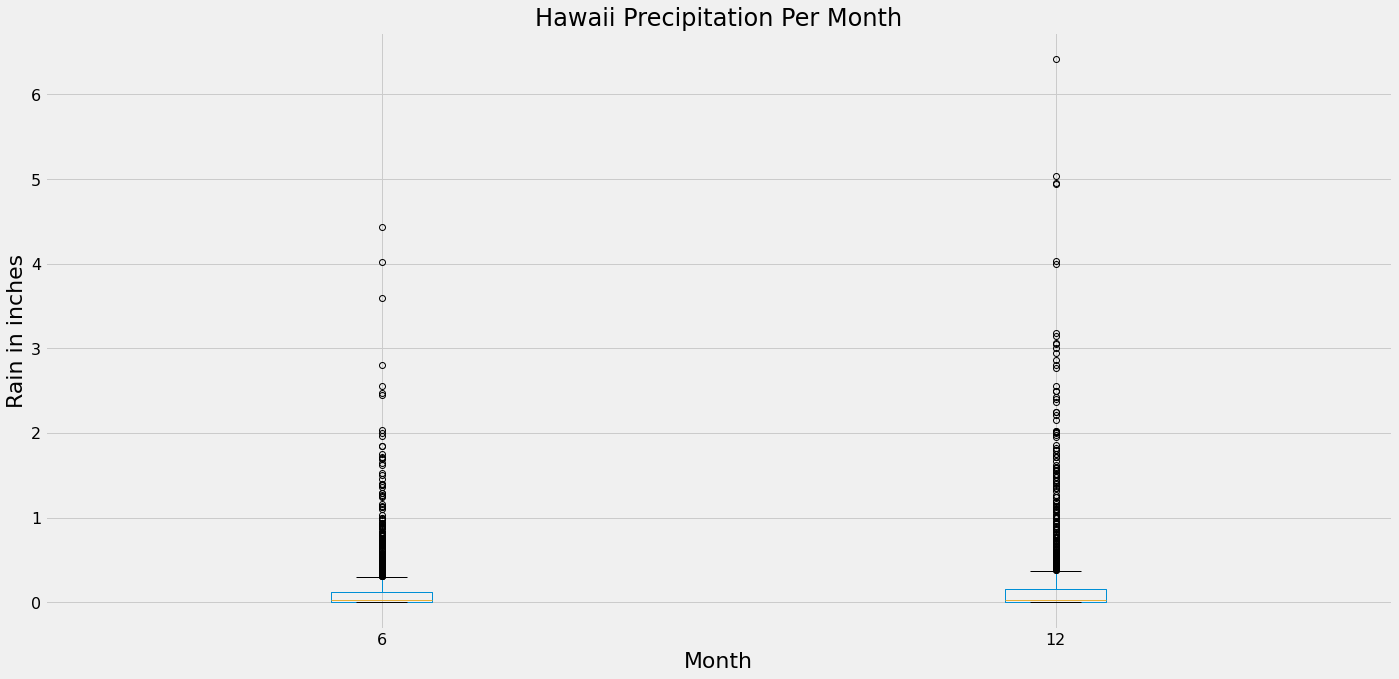

In [91]:
# BoxPlot of Temperature in June and December
june_dec_df.boxplot("prcp", by="month", figsize = (20,10))

plt.title("Hawaii Precipitation Per Month",fontdict ={"fontsize":24})
plt.suptitle("")
plt.xlabel("Month", fontdict={"fontsize":22})
plt.ylabel("Rain in inches", fontdict={"fontsize":22})
plt.tight_layout(pad = 2.0, w_pad = 1.5, h_pad = 2.0)
plt.xticks(fontsize = 16, color = 'k', rotation = 0)
plt.yticks(fontsize = 16, color = 'k', rotation = 0)

plt.savefig("Hawaii_Precipitarion_June_Dec.png")
plt.show()

In [101]:
n = June_temps['prcp']
m = Dec_temps['prcp']

In [102]:
sample_size = 500
alpha = 0.05
june_sample = np.random.choice(n, sample_size)
dec_sample = np.random.choice(m, sample_size)
compare_months(june_sample, dec_sample, alpha, sample_size)

Statistics = nan, p= nan
Different Distribution - Statistically Significant Difference in the two months


# Temperature Analysis II

In [103]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, maximum, and average temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# For example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [107]:
Temps_Week = (calc_temps('2017-08-01', '2017-08-08'))
print(Temps_Week)

[(72.0, 79.15625, 83.0)]


In [112]:
travel_week_temps_df = pd.DataFrame({
    "Value":["Min Temp","Mean Temp","Max Temp"],
    "Temp":[72.0, 79.2,83.0]
})

In [113]:
travel_week_temps_df

,Value,Temp
0,Min Temp,72.000
1,Mean Temp,79.200
2,Max Temp,83.000


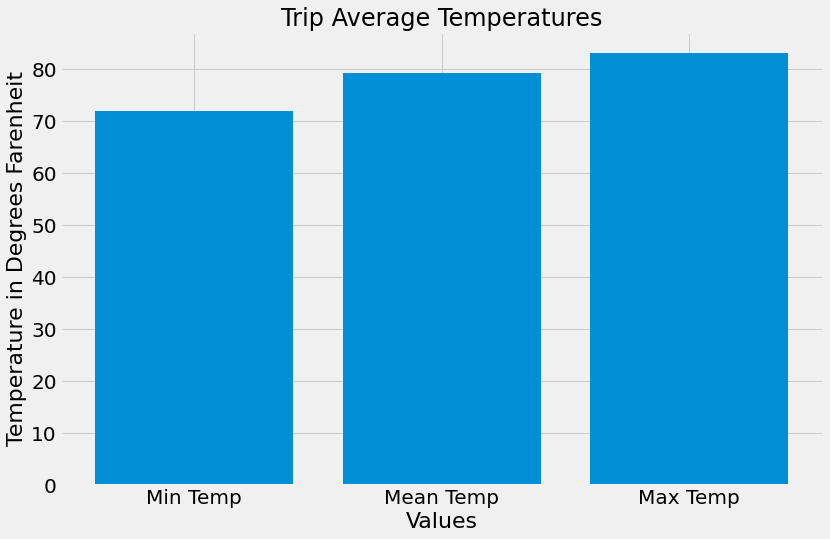

In [115]:
x_values = travel_week_temps_df.Value
y_values = travel_week_temps_df.Temp

fig8 = plt.figure(figsize = (12,8))
plt.bar(x_values,y_values)

plt.title("Trip Average Temperatures",fontdict ={"fontsize":24})
plt.suptitle("")
plt.xlabel("Values", fontdict={"fontsize":22})
plt.ylabel("Temperature in Degrees Farenheit", fontdict={"fontsize":22})
plt.tight_layout(pad = 2.0, w_pad = 1.5, h_pad = 2.0)
plt.xticks(fontsize = 20, color = 'k', rotation = 0)
plt.yticks(fontsize = 20, color = 'k', rotation = 0)

plt.savefig("Trip_Ave_Temp.png")
plt.show()

### Daily Rainfall Average

In [116]:
# Use this function to calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()

# For example
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [117]:
start_date = '2017-08-01'
end_date = '2017-08-07'

In [137]:
Day1_Normals = daily_normals("08-01")
Day2_Normals = daily_normals("08-02")
Day3_Normals = daily_normals("08-03")
Day4_Normals = daily_normals("08-04")
Day5_Normals = daily_normals("08-05")
Day6_Normals = daily_normals("08-06")
Day7_Normals = daily_normals("08-07")
cols = ["Min","Mean","Max"]

In [165]:
s1 = Day1_Normals[0]
s2 = Day2_Normals[0]
s3 = Day3_Normals[0]
s4 = Day4_Normals[0]
s5 = Day5_Normals[0]
s6 = Day6_Normals[0]
s7 = Day7_Normals[0]

In [190]:
vdays = ["08-01","08-02","08-03","08-04","08-05","08-06","08-07"]

In [191]:
normals_df = pd.DataFrame([list(s1),list(s2),list(s3),list(s4),list(s5),list(s6),list(s7)], columns = cols)
normals_df

,Min,Mean,Max
0,67.000,75.540,83.000
1,68.000,75.604,84.000
2,70.000,76.611,85.000
3,69.000,76.712,84.000
4,69.000,76.148,82.000
5,67.000,76.250,83.000
6,71.000,77.157,83.000


In [198]:
normals_df['Date'] = vdays
normals_df = normals_df[['Date','Min','Mean','Max']]
normals_df.set_index("Date",inplace=True)
normals_df

,Min,Mean,Max
Date,,,
08-01,67.000,75.540,83.000
08-02,68.000,75.604,84.000
08-03,70.000,76.611,85.000
08-04,69.000,76.712,84.000
08-05,69.000,76.148,82.000
08-06,67.000,76.250,83.000
08-07,71.000,77.157,83.000


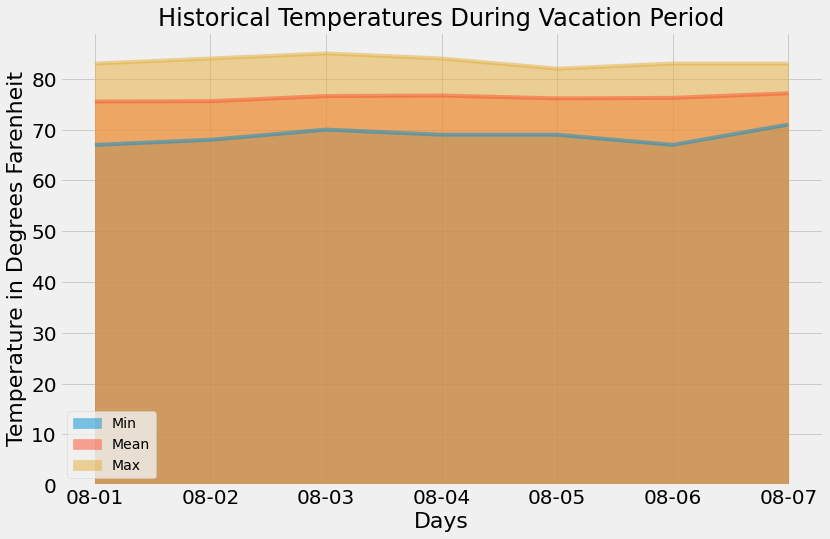

In [199]:
# Create a Area Plot for the daily normals
normals_df.plot(kind='area',stacked = False, figsize =(12,8))
plt.title("Historical Temperatures During Vacation Period",fontdict ={"fontsize":24})
plt.suptitle("")
plt.xlabel("Days", fontdict={"fontsize":22})
plt.ylabel("Temperature in Degrees Farenheit", fontdict={"fontsize":22})
plt.tight_layout(pad = 2.0, w_pad = 1.5, h_pad = 2.0)
plt.xticks(fontsize = 20, color = 'k', rotation = 0)
plt.yticks(fontsize = 20, color = 'k', rotation = 0)

plt.savefig("Stacked_Temperatures.png")
plt.show()

# CLOSE SESSION

In [200]:
# Close Session
session.close()